DLBasic - test - David Marcovici

In [1]:
# import modules
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
# import iris dataset
iris_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
print('iris df cols:', iris_df.columns.values)

iris df cols: ['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth' 'Name']


Above we import the iris dataset. This dataset consists of 150 samples with 4 features (sepallength, sepalwidth, petallength, petalwidth) and 3 labels (setosa, versicolor, virginica).

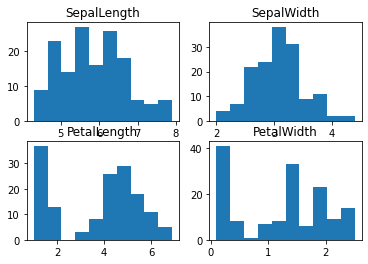

In [3]:
# plot histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(iris_df['SepalLength'], bins=n_bins);
axs[0, 0].set_title('SepalLength');
axs[0, 1].hist(iris_df['SepalWidth'], bins=n_bins);
axs[0, 1].set_title('SepalWidth');
axs[1, 0].hist(iris_df['PetalLength'], bins=n_bins);
axs[1, 0].set_title('PetalLength');
axs[1, 1].hist(iris_df['PetalWidth'], bins=n_bins);
axs[1, 1].set_title('PetalWidth');

Above are the histogram plots for the 4 features of the dataset.
It can be seen that all the features have the same scale so normalization of the data is not required.
Also, the petal features has more seperated grouping nature compared to the sepal features.

<AxesSubplot:>

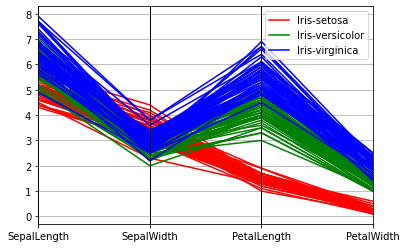

In [4]:
# plot parallel coordinates plot
fig = plt.figure()
parallel_coordinates(iris_df, 'Name', color=['r', 'g', 'b'])

Above is a parallel coordinates plot.
One can see that the labels (iris species) are more seperable using the petal features rahter than the sepal features.

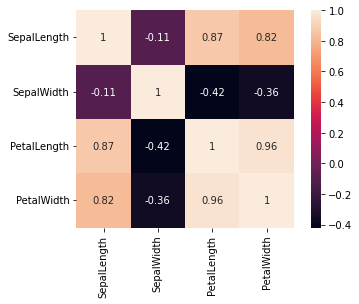

In [5]:
# plot correlation matrix
fig = plt.figure()
corrmat = iris_df.corr()
sns.heatmap(corrmat, annot=True, square=True);

Above is a correlation matrix showing the correlation between the features.
One can see that the petallength and petalwidth are highly correlated, and the sepallength and sepalwidth are almost uncorrelated. We can also a correlation between the sepallength and petal features. 

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

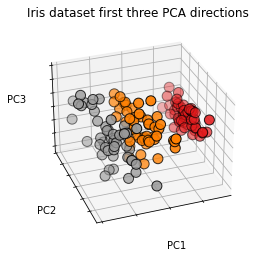

In [6]:
# plot the first three PCA dimensions
X = iris_df.values[:, :4]
Y = iris_df.values[:, 4]
d = dict([(y, x + 1) for x, y in enumerate(sorted(set(Y)))])
Ynums = [d[x] for x in Y]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=Ynums,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=100,
)
ax.set_title("Iris dataset first three PCA directions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])

Above is scatter plot of the dataset points which were reduced to three dimensions using the PCA dimension reduction method. This enable us to visualize the data while capturing most of its contect/variance. PCA method calculate a projection of the original data into the same number or fewer dimensions (here 3 dimensions are used for visualization).
One can see that the data is highly speprable using the first principal component (PC1), and that linear desicion lines can provide good seperation for this dataset.

In [7]:
# split the data to train and test data sets
train, test = train_test_split(iris_df, test_size=0.2, random_state=10)
X_train = train.values[:, :4]
Y_train = train.values[:, 4]
X_test = test.values[:, :4]
Y_test = test.values[:, 4]

Here we are spliting the dataset to train and test dataset. Since we dont a lot of data points, train-test split rather than train-validation-test split is used. We will then use k-fold cross validation on the train data and report the final prediction performance on the test data. We chose a 80%-20% train-test split which is a common rule-of-thumb split.

Performing RandomForest CV:
Nestimators =  1
Nestimators =  2
Nestimators =  3
Nestimators =  4
Nestimators =  5
Nestimators =  6
RF Best Accuracy by CV: 0.9583333333333334  (Nestimators =  4 )


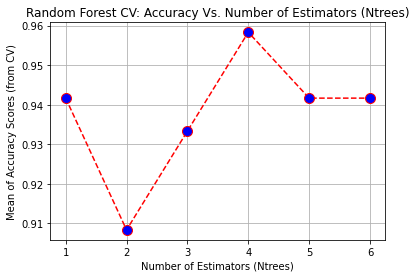

In [8]:
# find best random forest classifier in terms of Nestimators using k cross validation on the train set
k_folds = 30
estimators_range = np.arange(1, 7)
mean_accuracy = []
rf_clf_list = []
print('Performing RandomForest CV:')
for i_rf in estimators_range:
    print('Nestimators = ', i_rf)
    rf_clf = RandomForestClassifier(n_estimators=i_rf)
    cross_val_scores = cross_val_score(rf_clf, X_train, Y_train, cv=k_folds, scoring='accuracy')
    mean_accuracy.append(np.mean(cross_val_scores))
    rf_clf_list.append(rf_clf)

fig = plt.figure()
plt.plot(estimators_range, mean_accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest CV: Accuracy Vs. Number of Estimators (Ntrees)')
plt.xlabel('Number of Estimators (Ntrees)')
plt.ylabel('Mean of Accuracy Scores (from CV)')
plt.grid()

rf_best_accuracy_by_CV = np.max(mean_accuracy)
rf_best_nestimators_by_CV = estimators_range[np.argmax(mean_accuracy)]
best_rf_clf = rf_clf_list[np.argmax(mean_accuracy)]
print('RF Best Accuracy by CV:', rf_best_accuracy_by_CV, ' (Nestimators = ', rf_best_nestimators_by_CV, ')')

Above we use a random forest classifier to classify the iris species.
Random forests are an ensemble learning method for classification and regression. They operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
In order to find the best number of trees (n_estimators) we are using k-fold cross validation on train data (30 folds for n_estimatiors range 1 to 6).

In [9]:
# best rf model evaluation using the test set
best_rf_clf.fit(X_train, Y_train)
rf_prediction = best_rf_clf.predict(X_test)
print('RF Predicition Accuracy on Test Data= %.2f' % metrics.accuracy_score(rf_prediction, Y_test))

RF Predicition Accuracy on Test Data= 0.97


Above we are fitting the the random forest with the chosen n_estimators to the train data and provide a final evaulation of its prediction performance using the test data.

Text(0.5, 1.0, 'Random Forest Classifier Confusion matrix')

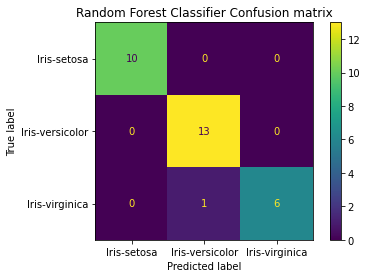

In [10]:
# best rf model confusion matrix based on the test set
disp = metrics.ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, Y_test,
                                                     display_labels=best_rf_clf.classes_)
disp.ax_.set_title('Random Forest Classifier Confusion matrix')

Above is a confusion matrix providing an in-depth view of the random forest classification performance on the test dataset.

In [11]:
# test also the linear SVM classifier performance
svc_clf = SVC(kernel='linear')
svc_clf.fit(X_train, Y_train)
svc_prediction = svc_clf.predict(X_test)
print('Linear SVM Predicition Accuracy on Test Data= %.2f' % metrics.accuracy_score(svc_prediction, Y_test))

Linear SVM Predicition Accuracy on Test Data= 0.97


Above we are using another classifier for iris species classification - Linear SVM.
Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a decision boundary maximizing the margin between the classes. Since a linear SVM is used here, the decision boundaries are linear (we saw previously that the iris dataset is highly seperable using linear decision boundaries). 
As before, here we are fitting the the linear SVM model to the train data and provide a final evaulation of its prediction performance using the test data.

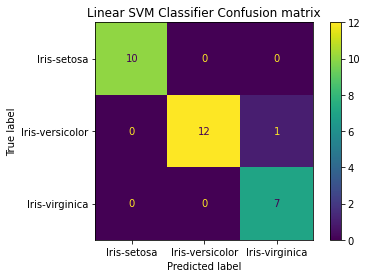

In [12]:
# linear SVM confusion matrix based on the test set
disp = metrics.ConfusionMatrixDisplay.from_estimator(svc_clf, X_test, Y_test,
                                                     display_labels=svc_clf.classes_)
disp.ax_.set_title('Linear SVM Classifier Confusion matrix')
plt.show()

Above is a confusion matrix providing an in-depth view of the linear SVM classification performance on the test dataset.

Overall, we got very good performance (over 95% accuracy) using both the Random forest and the Linear SVM algorithms. 